In [373]:
import numpy as np
import matplotlib.pyplot as plt

In [374]:
# Max switching current in A
Ilim = 6.5
# Worst case efficiency
eff = 0.85
# Worst case input voltage
vin = np.linspace(2, 4, 1000)
vin_lbl = "Input Voltage (V)"
# Nominal output voltage
vout = 5
# Desired max output current amps
iout = 3
# Inductor value in henrys
# l = 0.8e-6
l = [0.33e-6, 0.68e-6, 0.7e-6, 0.75e-6, 0.8e-6, 1e-6, 2e-6]
# l = [0.700e-6, 0.72e-6, 0.75e-6, 0.76e-6, 0.78e-6, 0.8e-6]
# switching frequency in hertz
fsw = 1e6
# output capacitor in farads
cout = 44e-6

In [375]:
def makePlot(x, y, xl, yl, label=None, bx=None, by=None, bl=None):
    hadlbl = label is not None
    if len(np.shape(x)) == 1:
        x = (x,)
        y = (y,)
        label = (label,)
    fig,ax = plt.subplots()
    # Plot main things
    for i in range(len(x)):
        xv = x[i]
        yv = y[i]
        if len(label) > i:
            lbl = label[i]
            ax.plot(xv, yv, label=lbl)
        else:
            ax.plot(xv, yv)
    # Plot bonus things
    if bx is not None and by is not None and bl is not None:
        ax.plot(bx, by, '--', label=bl)
    ax.grid("both")
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_title(f"{yl.split('(')[0][:-1]} vs {xl.split('(')[0][:-1]}")
    if hadlbl:
        ax.legend()
    plt.show()

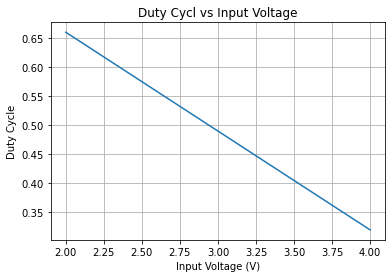

In [376]:
duty = 1 - ((vin * eff) / vout)
duty_label = "Duty Cycle"
makePlot(vin, duty, vin_lbl, duty_label)
# print(f"Duty cycle: {duty*100:.1f}%")

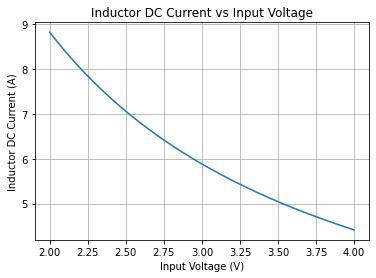

In [377]:
ildc = (vout * iout) / (vin * eff)
ildc_label = "Inductor DC Current (A)"
makePlot(vin, ildc, vin_lbl, ildc_label)
# print(f"Inductor DC current: {ildc:.2f}A")
# print(f"Inductor DC 40% : {ildc*0.4:.2f}A")

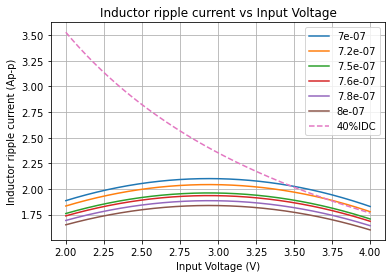

In [378]:
ving, lg = np.meshgrid(vin, l)
ilpp = (ving * duty) / (lg * fsw)
ilpp_label = "Inductor ripple current (Ap-p)"
makePlot(ving, ilpp, vin_lbl, ilpp_label, label=l, bx=vin, by=ildc*0.4, bl="40%IDC")
# makePlot((vin,vin), (ilpp,ildc*0.4), vin_lbl, ilpp_label, label=("Ripple","40%IDC"))
# print(f"Inductor ripple current: {ilpp:.2f}Ap-p")
# print(f"Inductor riple percent: {(ilpp/ildc)*100:.1f}%")

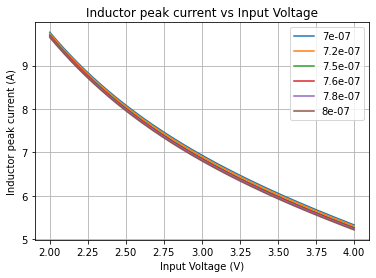

In [379]:
ilpk = ildc + (ilpp / 2)
ilpk_label = "Inductor peak current (A)"
makePlot(ving, ilpk, vin_lbl, ilpk_label, label=l)
# print(f"Inductor peak current: {ilpk:.2f}A")

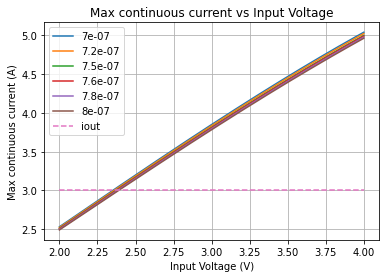

In [382]:
Ioutcl = (1-duty) * (Ilim + ((1/2) * ilpp))
Ioutcl_label = "Max continuous current (A)"
# print(f"Max continuous current: {Ioutcl:.2f}A")
# makePlot(vin, Ioutcl, vin_lbl, Ioutcl_label, "Iout", bonusy=iout, bonuslabel="Desired")
makePlot(ving, Ioutcl, vin_lbl, Ioutcl_label, label=l, bx=vin, by=np.ones(len(vin))*iout, bl="iout")

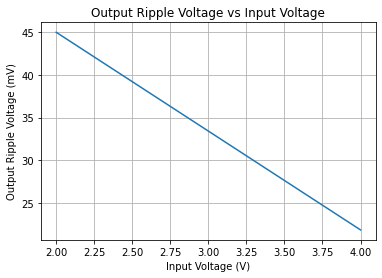

In [381]:
vripple = (iout * duty) / (fsw * cout)
vripple_label = "Output Ripple Voltage (mV)"
makePlot(vin, vripple*1000, vin_lbl, vripple_label)